In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import os
import sys

py_SPC_path = os.path.normpath(r"C:\TRAVAIL\recherche\code\pySPC")
print(py_SPC_path)
sys.path.insert(0, py_SPC_path)

from core import Experiment

Populating the interactive namespace from numpy and matplotlib
C:\TRAVAIL\recherche\code\pySPC


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


OF1440_405nm_Pnc_405Dichro_405BP_0-100-DMSO-Water_1mM.spc


t0_ini : 4.482989
Two Decays
Two Decays
Name       Value        Min        Max
amp1   2.724e+04          0        inf
amp2   2.155e+04          0        inf
cst        970.7          0        inf
t0         5.106          0        inf
tau1      0.6527          0        inf
tau2       3.103          0        inf
1455.2507161289686
OF1440_405nm_Pnc_405Dichro_405BP_10-90-DMSO-Water_1mM.spc


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


t0_ini : 4.489096
Two Decays
Two Decays
Name       Value        Min        Max
amp1   1.888e+04          0        inf
amp2   1.892e+04          0        inf
cst        813.8          0        inf
t0         5.403          0        inf
tau1      0.7904          0        inf
tau2        3.44          0        inf
1859.6924239959917
OF1440_405nm_Pnc_405Dichro_405BP_20-80-DMSO-Water_1mM.spc


t0_ini : 4.501312
Two Decays
Two Decays
Name       Value        Min        Max
amp1   1.497e+04          0        inf
amp2   1.804e+04          0        inf
cst        805.6          0        inf
t0         5.602          0        inf
tau1      0.7743          0        inf
tau2       3.357          0        inf
1699.532236727362
OF1440_405nm_Pnc_405Dichro_405BP_50-50-DMSO-Water_1mM.spc


t0_ini : 4.489096
Two Decays
Two Decays
Name       Value        Min        Max
amp1   3.643e+05          0        inf
amp2        7854          0        inf
cst        120.4          0        inf
t0         1.923          0        inf
tau1      0.6891          0        inf
tau2        2.98          0        inf
304.4907933154318
OF1440_405nm_Pnc_405Dichro_405BP_80-20-DMSO-Water_1mM.spc


t0_ini : 4.434128
Two Decays
Two Decays
Name       Value        Min        Max
amp1   9.765e+04          0        inf
amp2    0.003681          0        inf
cst          171          0        inf
t0          4.81          0        inf
tau1      0.5206          0        inf
tau2       1.852          0        inf
9368.398815461434
OF1440_405nm_Pnc_405Dichro_405BP_90-10-DMSO-Water_1mM.spc


t0_ini : 4.446343
Two Decays
Two Decays
Name       Value        Min        Max
amp1   8.926e+04          0        inf
amp2   2.234e+04          0        inf
cst      0.03147          0        inf
t0         4.842          0        inf
tau1      0.6535          0        inf
tau2      0.6536          0        inf
13686.190793604066
OF1440_405nm_Pnc_405Dichro_405BP_100-0-DMSO-Water_1mM.spc


t0_ini : 4.470773
Two Decays
Two Decays


Name       Value        Min        Max
amp1        2772          0        inf
amp2    0.001096          0        inf
cst        9.841          0        inf
t0          3.88          0        inf
tau1      0.7526          0        inf
tau2       2.749          0        inf
149.42972998859295


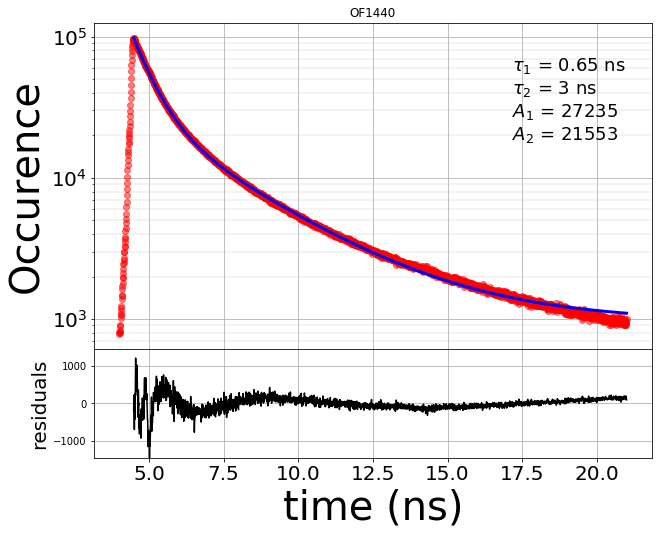

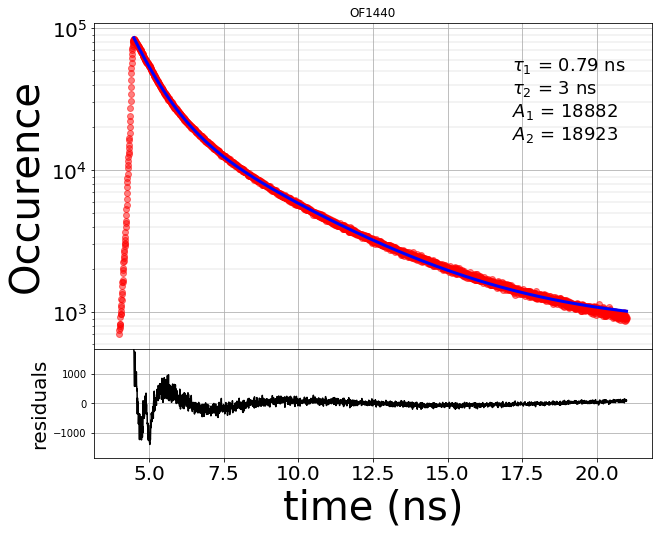

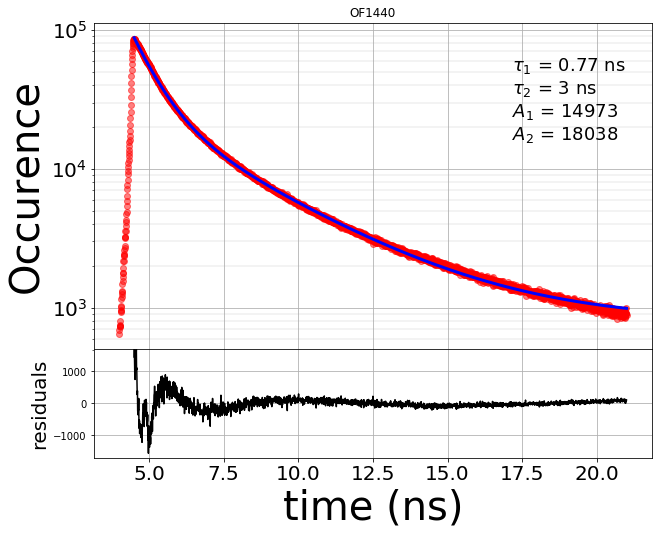

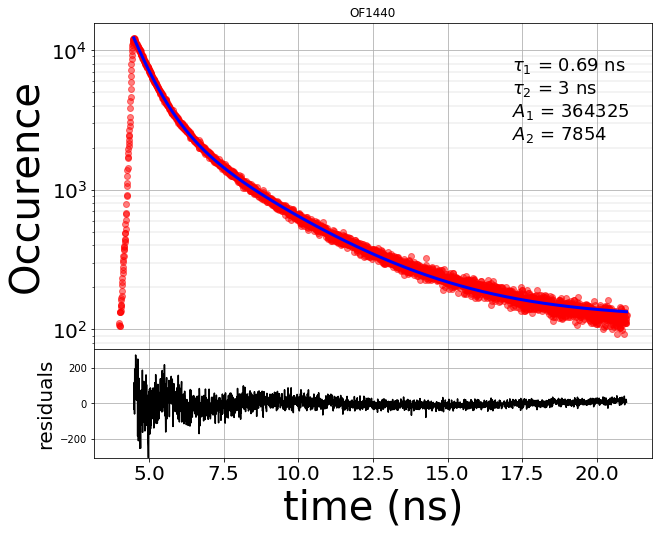

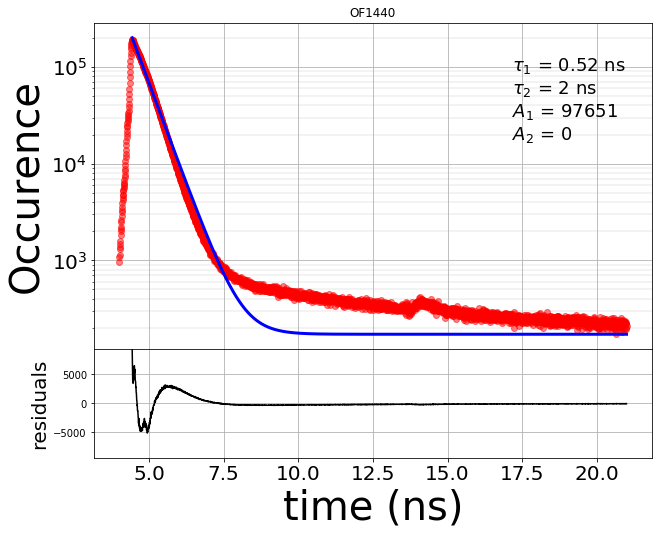

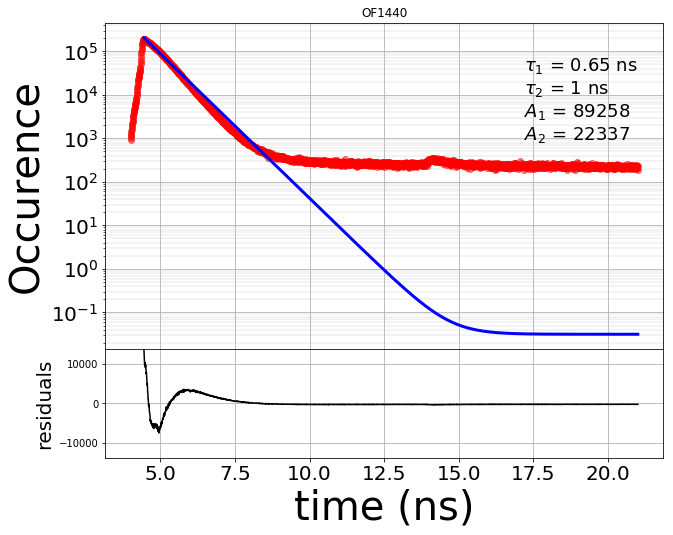

In [50]:
# Relative path
datapath = r"C:\Users\MatthieuL\Documents\data\2018_10_23_TpsDeVieOlia_AIE\OF1440"
filepath_100Water =  r"OF1440_405nm_Pnc_405Dichro_405BP_0-100-DMSO-Water_1mM.spc"
filepath_90Water =  r"OF1440_405nm_Pnc_405Dichro_405BP_10-90-DMSO-Water_1mM.spc"
filepath_80Water =  r"OF1440_405nm_Pnc_405Dichro_405BP_20-80-DMSO-Water_1mM.spc"
filepath_50Water =  r"OF1440_405nm_Pnc_405Dichro_405BP_50-50-DMSO-Water_1mM.spc"
filepath_20Water =  r"OF1440_405nm_Pnc_405Dichro_405BP_80-20-DMSO-Water_1mM.spc"
filepath_10Water =  r"OF1440_405nm_Pnc_405Dichro_405BP_90-10-DMSO-Water_1mM.spc"
filepath_0Water =  r"OF1440_405nm_Pnc_405Dichro_405BP_100-0-DMSO-Water_1mM.spc"

file_paths = [filepath_100Water, filepath_90Water, filepath_80Water, filepath_50Water, filepath_20Water, filepath_10Water, filepath_0Water]

A2overA1 = []
tau1 = []
tau2 = []

for filepath in file_paths:
    print(filepath)
    filepath = os.path.normpath(os.path.join(datapath, filepath))  
    # Create the main (model) object and fill it with the spc file
    exp = Experiment.Experiment(filepath)
    # Calculate the microtime histogramm and fill the corresponding result object
    exp.micro_time_life_time()
    # Alias variables from the results object.
    # There are as many lifetime results as there are channels.
    lifetime_histogram = exp.results.lifetimes[0].data
    lifetime_time_axis = exp.results.lifetimes[0].timeAxis
    lim_min = np.searchsorted(lifetime_time_axis, 4)
    lim_max = np.searchsorted(lifetime_time_axis, 21)

    lifetime_histogram = lifetime_histogram[lim_min:lim_max]
    lifetime_time_axis = lifetime_time_axis[lim_min:lim_max]
    # # Plot
    # plt.semilogy(lifetime_time_axis, lifetime_histogram)
    # plt.xlabel("time (ns)")
    # plt.ylabel("Occurence")
    # plt.show()
    
    
    # 
    # plt.semilogy(lifetime_time_axis, lifetime_histogram)
    # plt.xlabel("time (ns)")
    # plt.ylabel("Occurence")
    # plt.show()
    
    
    # Fit
    t0_ini = lifetime_time_axis[np.argmax(lifetime_histogram)]
    print("t0_ini : %f" % t0_ini)
    amp1_ini = 5E4
    tau1_ini = 0.65
    amp2_ini = 2E4
    tau2_ini = 3.5
    cst_ini = 150


    exp.results.lifetimes[0].set_model("Two Decays")
    # exp.results.lifetimes[0].guess(idx_start=idx_decay_curve_start, idx_end=-1)
    exp.results.lifetimes[0].set_params([t0_ini, amp1_ini, tau1_ini, amp2_ini, tau2_ini, cst_ini])
    fit_results = exp.results.lifetimes[0].fit(idx_start=t0_ini, idx_end=21)
    lifetime_time_axis_fit = lifetime_time_axis[np.searchsorted(lifetime_time_axis, t0_ini):np.searchsorted(lifetime_time_axis, 21)]
    
    fit_results.params.pretty_print(colwidth=10, columns=['value', 'min', 'max'])
    
    tau1.append(fit_results.values['tau1'])
    tau2.append(fit_results.values['tau2'])
    A2overA1.append(fit_results.values['amp2'] / fit_results.values['amp1'])
    # print(fit_results)
    # print(fit_results.fit_report())

    # print(fit_results.best_values)
    # plt.semilogy(lifetime_time_axis, lifetime_histogram)
    # plt.semilogy(lifetime_time_axis_fit, fit_results.best_fit)
    
    # Plot
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True,
                       gridspec_kw={'height_ratios': [3, 1]})
    plt.subplots_adjust(hspace=0)
    ax[0].semilogy(lifetime_time_axis, lifetime_histogram, "ro", alpha=0.5)
    for a in ax:
        a.grid(True); a.grid(True, which='minor', lw=0.3)
    ax[0].plot(lifetime_time_axis_fit, fit_results.best_fit, "b-", linewidth=3)
    ax[1].plot(lifetime_time_axis_fit, fit_results.residual, 'k')
    ym = np.abs(fit_results.residual).max()
    print(ym)
    ax[1].set_ylim(-ym, ym)
    # ax[1].set_xlim(bins[0]*unit, bins[-1]*unit);
    # tau_diff_us = fitres.values['tau_diff'] * 1e6
    msg = ((r'$\tau_1$ = {tau1:.2f} ns'+'\n'+r'$\tau_2$ = {tau2:.0f} ns' + '\n' + r'$A_1$ = {A1:.0f}' + '\n' + r'$A_2$ = {A2:.0f}')
           .format(tau1=fit_results.values['tau1'], tau2=fit_results.values['tau2'], A1=fit_results.values['amp1'], A2=fit_results.values['amp2']))
    ax[0].text(.75, .9, msg,
               va='top', ha='left', transform=ax[0].transAxes, fontsize=18);
    ax[0].set_ylabel('Occurence',  fontsize=40)
    ax[1].set_ylabel('residuals', fontsize=20)
    ax[0].set_title('OF1440')
    ax[1].set_xlabel('time (ns)', fontsize=40)
    
    ax[0].tick_params(axis='both', which='major', labelsize=20)
    ax[0].tick_params(axis='both', which='minor', labelsize=8)
    
    ax[1].tick_params(axis='x', which='major', labelsize=20)
    ax[1].tick_params(axis='x', which='minor', labelsize=8)
    
    fig.show()


    # fig, GridSpec = fit_results.plot()
    # fig.show()  











OF1430_405nm_Pnc_405Dichro_405BP_10-90-DMSO-Water_1mM.spc


t0_ini : 4.739508
Two Decays
Two Decays
Name       Value        Min        Max
amp1    3.22e+04          0        inf
amp2   1.898e+04          0        inf
cst        241.2          0        inf
t0         4.873          0        inf
tau1       1.348          0        inf
tau2       3.882          0        inf


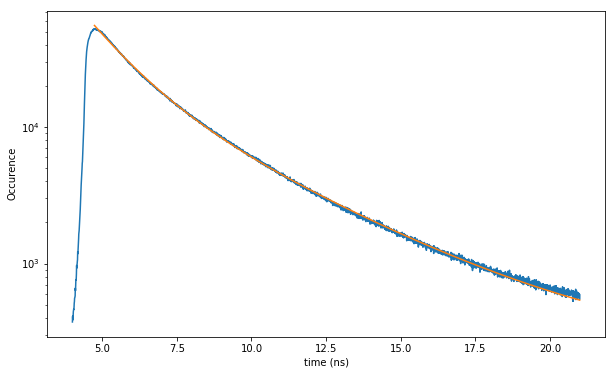

OF1430_405nm_Pnc_405Dichro_405BP_20-80-DMSO-Water_1mM.spc


t0_ini : 4.696755
Two Decays
Two Decays
Name       Value        Min        Max
amp1   3.282e+04          0        inf
amp2   2.021e+04          0        inf
cst        240.6          0        inf
t0         4.914          0        inf
tau1       1.408          0        inf
tau2       3.912          0        inf


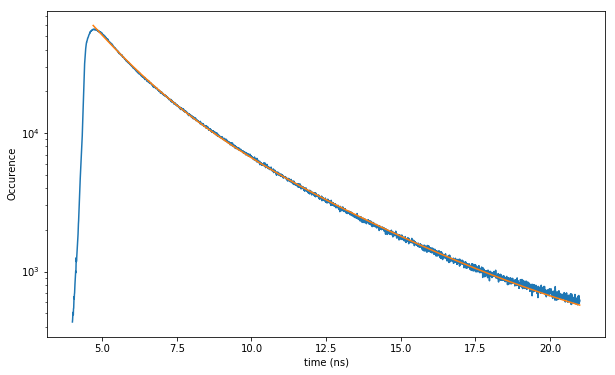

OF1430_405nm_Pnc_405Dichro_405BP_50-50-DMSO-Water_1mM.spc


t0_ini : 4.794477
Two Decays
Two Decays
Name       Value        Min        Max
amp1   2.726e+04          0        inf
amp2   2.192e+04          0        inf
cst        290.6          0        inf
t0         5.212          0        inf
tau1        1.25          0        inf
tau2        3.41          0        inf


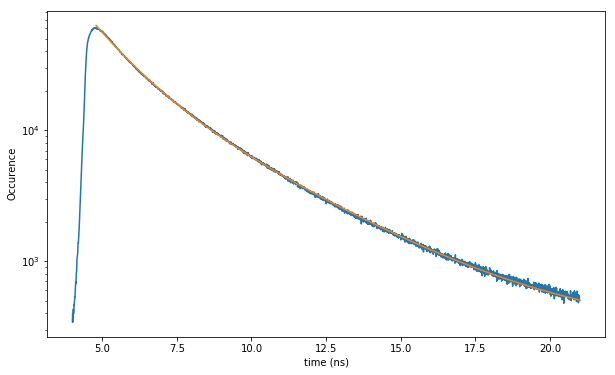

OF1430_405nm_Pnc_405Dichro_405BP_80-20-DMSO-Water_1mM.spc


t0_ini : 4.458558
Two Decays
Two Decays


Name       Value        Min        Max
amp1   1.357e+04          0        inf
amp2   7.263e-11          0        inf
cst           28          0        inf
t0         3.992          0        inf
tau1      0.9866          0        inf
tau2       2.885          0        inf


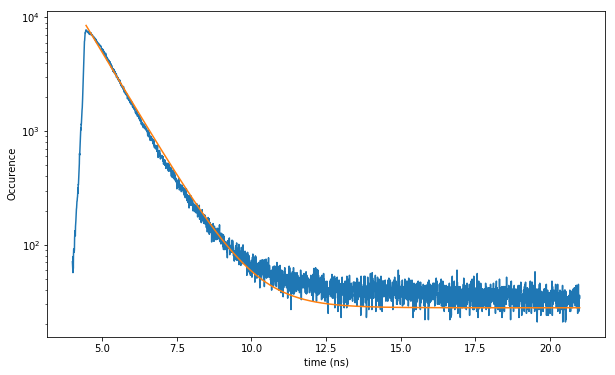

OF1430_405nm_Pnc_405Dichro_405BP_90-10-DMSO-Water_1mM.spc


t0_ini : 4.464666
Two Decays
Two Decays


Name       Value        Min        Max
amp1   1.175e+04          0        inf
amp2     0.01205          0        inf
cst        23.67          0        inf
t0         4.169          0        inf
tau1        1.01          0        inf
tau2       2.955          0        inf


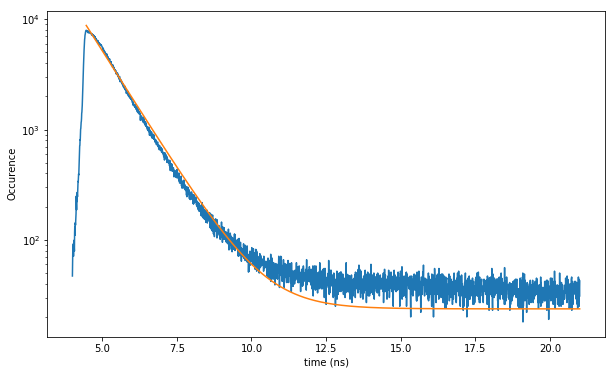

OF1430_405nm_Pnc_405Dichro_405BP_100-00-DMSO-Water_1mM.spc


t0_ini : 4.470773
Two Decays
Two Decays


Name       Value        Min        Max
amp1   3.898e+04          0        inf
amp2   0.0003156          0        inf
cst        30.52          0        inf
t0         4.325          0        inf
tau1      0.9744          0        inf
tau2       3.758          0        inf


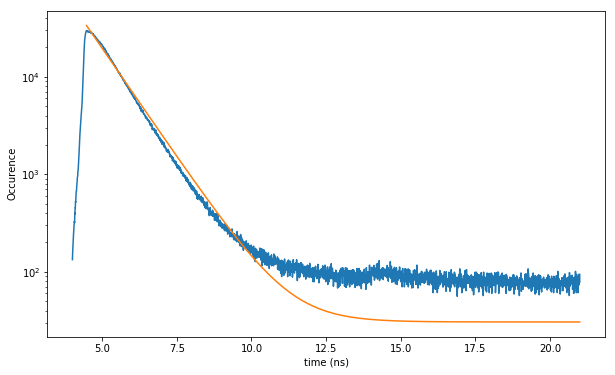

In [45]:
# Relative path
datapath = r"C:\Users\MatthieuL\Documents\data\2018_10_23_TpsDeVieOlia_AIE\OF1430"
# filepath_100Water =  r"OF1430_405nm_Pnc_405Dichro_405BP_0-100-DMSO-Water_1mM.spc"
filepath_90Water =  r"OF1430_405nm_Pnc_405Dichro_405BP_10-90-DMSO-Water_1mM.spc"
filepath_80Water =  r"OF1430_405nm_Pnc_405Dichro_405BP_20-80-DMSO-Water_1mM.spc"
filepath_50Water =  r"OF1430_405nm_Pnc_405Dichro_405BP_50-50-DMSO-Water_1mM.spc"
filepath_20Water =  r"OF1430_405nm_Pnc_405Dichro_405BP_80-20-DMSO-Water_1mM.spc"
filepath_10Water =  r"OF1430_405nm_Pnc_405Dichro_405BP_90-10-DMSO-Water_1mM.spc"
filepath_0Water =  r"OF1430_405nm_Pnc_405Dichro_405BP_100-00-DMSO-Water_1mM.spc"

file_paths = [filepath_90Water, filepath_80Water, filepath_50Water, filepath_20Water, filepath_10Water, filepath_0Water]

A2overA1 = []
tau1 = []
tau2 = []

for filepath in file_paths:
    print(filepath)
    filepath = os.path.normpath(os.path.join(datapath, filepath))  
    # Create the main (model) object and fill it with the spc file
    exp = Experiment.Experiment(filepath)
    # Calculate the microtime histogramm and fill the corresponding result object
    exp.micro_time_life_time()
    # Alias variables from the results object.
    # There are as many lifetime results as there are channels.
    lifetime_histogram = exp.results.lifetimes[0].data
    lifetime_time_axis = exp.results.lifetimes[0].timeAxis
    lim_min = np.searchsorted(lifetime_time_axis, 4)
    lim_max = np.searchsorted(lifetime_time_axis, 21)

    lifetime_histogram = lifetime_histogram[lim_min:lim_max]
    lifetime_time_axis = lifetime_time_axis[lim_min:lim_max]
    # # Plot
    # plt.semilogy(lifetime_time_axis, lifetime_histogram)
    # plt.xlabel("time (ns)")
    # plt.ylabel("Occurence")
    # plt.show()
    
    
    # 
    # plt.semilogy(lifetime_time_axis, lifetime_histogram)
    # plt.xlabel("time (ns)")
    # plt.ylabel("Occurence")
    # plt.show()
    
    
    # Fit
    t0_ini = lifetime_time_axis[np.argmax(lifetime_histogram)]
    print("t0_ini : %f" % t0_ini)
    amp1_ini = 5E4
    tau1_ini = 0.65
    amp2_ini = 2E4
    tau2_ini = 3.5
    cst_ini = 150


    exp.results.lifetimes[0].set_model("Two Decays")
    # exp.results.lifetimes[0].guess(idx_start=idx_decay_curve_start, idx_end=-1)
    exp.results.lifetimes[0].set_params([t0_ini, amp1_ini, tau1_ini, amp2_ini, tau2_ini, cst_ini])
    fit_results = exp.results.lifetimes[0].fit(idx_start=t0_ini, idx_end=21)
    lifetime_time_axis_fit = lifetime_time_axis[np.searchsorted(lifetime_time_axis, t0_ini):np.searchsorted(lifetime_time_axis, 21)]
    
    fit_results.params.pretty_print(colwidth=10, columns=['value', 'min', 'max'])
    
    tau1.append(fit_results.values['tau1'])
    tau2.append(fit_results.values['tau2'])
    A2overA1.append(fit_results.values['amp2'] / fit_results.values['amp1'])
    # print(fit_results)
    # print(fit_results.fit_report())

    # print(fit_results.best_values)
    plt.semilogy(lifetime_time_axis, lifetime_histogram)
    plt.semilogy(lifetime_time_axis_fit, fit_results.best_fit)
    
    
#     ax[0].plot(taus, fitres.best_fit, "b-", linewidth=3)
# ax[1].plot(taus, fitres.residual, 'k')
    plt.xlabel("time (ns)")
    plt.ylabel("Occurence")
    plt.show()


    # fig, GridSpec = fit_results.plot()
    # fig.show()  











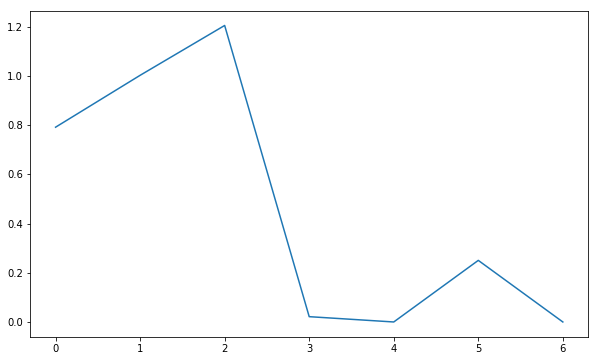

In [37]:
plt.plot(A2overA1)